<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Capstone_Project_Credit_Score</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

# Welcome

In this project, a predictive deep learning model will be created. In order for the model to give accurate and proper results, first the data and features will be checked, the application of EDA processes.

Then, a model for Multi-Class Classification will be created and the results will be evaluated. After some adjustments to get better results, the model will be deployed as the "final model".

Please take a look at the findings and tasks before diving into the project.

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [19]:
df = pd.read_csv("Score.csv")
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

# Determines

**Delay_from_due_date:** It refers to the delay between the payment date and the overdue date. This delay indicates how many days the payment is made after the due date.

**Num_of_Delayed_Payment:** It represents the number of past due payments for a particular account or customer. This feature indicates how often the customer makes payments after maturity.

**Num_Credit_Inquiries:** It shows the number of credit inquiries made during a specific time period regarding the credit history of a particular customer or account. This feature refers to the number of queries made about the customer's credit history.

**Credit_Utilization_Ratio:** It expresses the amount of credit used by a customer as a percentage based on his or her existing credit limits. This ratio shows the customer's credit usage habits by comparing the customer's current credit usage to the current credit limit. For example, if a customer's credit limit is 10,000 TL and this customer used a loan of 2,000 TL, the credit utilization rate will be 20%.

**Credit_History_Age:** How long a customer's credit history is can be an indicator of their credit history and financial history. A longer credit history can often have a positive impact on credit score and credit risk assessments.

**Payment_of_Min_Amount:** It is a feature that shows whether a customer has paid the minimum payment amount of his credit card or loan debt. This feature provides insight into the customer's payment habits and debt management.

**Amount_invested_monthly:** It refers to the amount of investment made by a customer in a particular month. This feature shows how much the customer invests monthly. Investment amounts can often include investments in different financial instruments (stocks, bonds, funds, etc.) and provide information about the client's savings and investment habits.

**Monthly_Balance:** It shows the remaining balance of a particular customer or account at the end of each month in the account during that month. This feature provides information about the financial status of the account over a specific period and gives insight into factors such as the customer's income-expense balance, spending habits or savings tendencies.
**Credit_Score:** It is a numerical score determined by evaluating factors such as a customer's credit history, payment habits, debts and financial situation. This score is an important metric that lenders use when evaluating their customers.

**Credit_Mix:** Credit diversity is important to a credit score because a balanced use of different types of credit (e.g., credit cards, mortgages) diversifies credit history and payment habits, which can create a higher credit score.

**Payment_Behaviour:** Payment habit is a critical factor in determining credit score. While regular payments support a high credit score, delays or missing payments can negatively impact your credit score.

**Age:** Age can affect credit score because it is often associated with a longer credit history and financial experience. A history of long-term, regular payments can often result in a higher credit score.

**Annual_Income:** Annual income is important in credit score evaluation because income level can reflect a person's ability to pay. Higher income can often indicate more credit and better ability to pay.

**Num_Bank_Accounts:** Multiple bank accounts can show financial stability and diversification, which can positively impact your credit score. Relationship with different financial institutions can help establish credit history.

**Num_of_Delayed_Payment:** It represents the number of past due payments for a particular account or customer. This feature indicates how often the customer makes payments after maturity.

**Num_Credit_Card:** Having more than one credit card can affect your credit score because it can be associated with factors such as varying credit usage and increasing limits.

**Interest_Rate:** The interest rates applied are especially important in terms of regularity and convenience in loan payments. Lower interest rates mean easier payments and lower costs, which can positively impact your credit score.

**Num_of_Loan:** Multiple loans or debts may reflect payment habits and debt management. However, excessive borrowing can create a risky situation and reduce your credit score.

**Monthly_Inhand_Salary:** The amount of monthly net income indicates the payment capacity and affects the ability to pay off debts. Higher income is generally associated with a better credit score.

**Changed_Credit_Limit:** Changes to the credit limit can reveal a customer's credit usage habits and credit requests, which can affect their credit score.

**Outstanding_Debt:** Unpaid debts can negatively impact your credit score, especially when compared to your credit limit. High debts can increase credit risk.

**Total_EMI_per_month:** The monthly installment amount indicates the client's ability to manage his debts. High installment payments may strain payment capacity and reduce credit score.

## Exploratory Data Analysis and Visualization

In [21]:
df.shape

(99960, 21)

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.duplicated().sum()

0

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,99960.000,21.096,14.827,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,99960.000,13.336,6.270,0.000,9.000,14.000,18.000,28.000
Num_Credit_Inquiries,99960.000,5.775,3.862,0.000,3.000,5.000,8.000,29.000
Credit_Utilization_Ratio,99960.000,32.285,5.117,20.000,28.052,32.305,36.496,50.000
Credit_History_Age,99960.000,221.123,99.696,1.000,144.000,219.000,302.000,404.000
Amount_invested_monthly,99960.000,193.665,194.783,0.000,73.709,129.342,234.324,1977.326
Monthly_Balance,99960.000,403.445,214.387,0.008,270.317,337.238,471.905,1602.041
Age,99960.000,33.269,10.762,14.000,24.000,33.000,42.000,56.000
Annual_Income,99960.000,50498.704,38294.243,7005.930,19338.480,36996.830,71681.400,179987.280
Num_Bank_Accounts,99960.000,5.369,2.592,0.000,3.000,5.000,7.000,10.000


Standard    53149
Poor        28988
Good        17823
Name: Credit_Score, dtype: int64


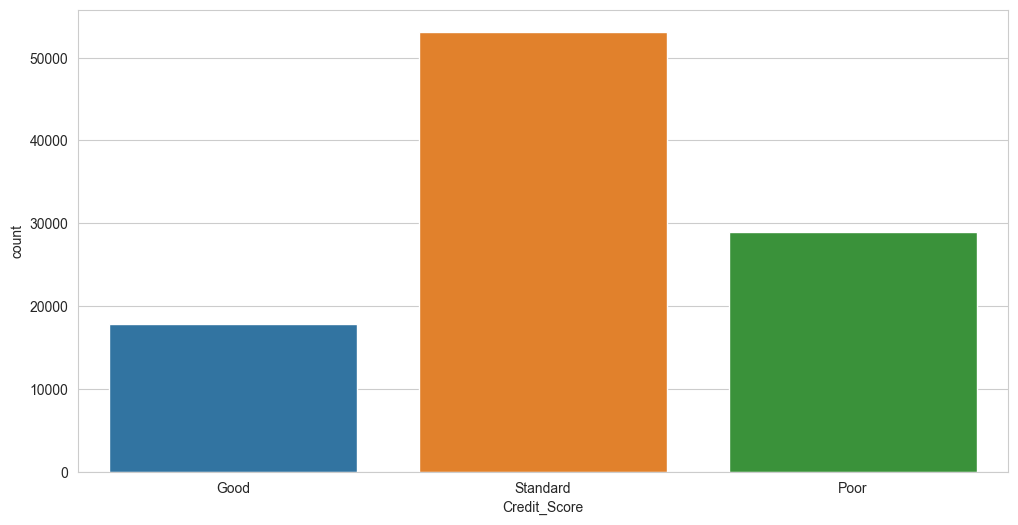

In [25]:
print(df.Credit_Score.value_counts())
sns.countplot(df["Credit_Score"]);      # unbalanced 

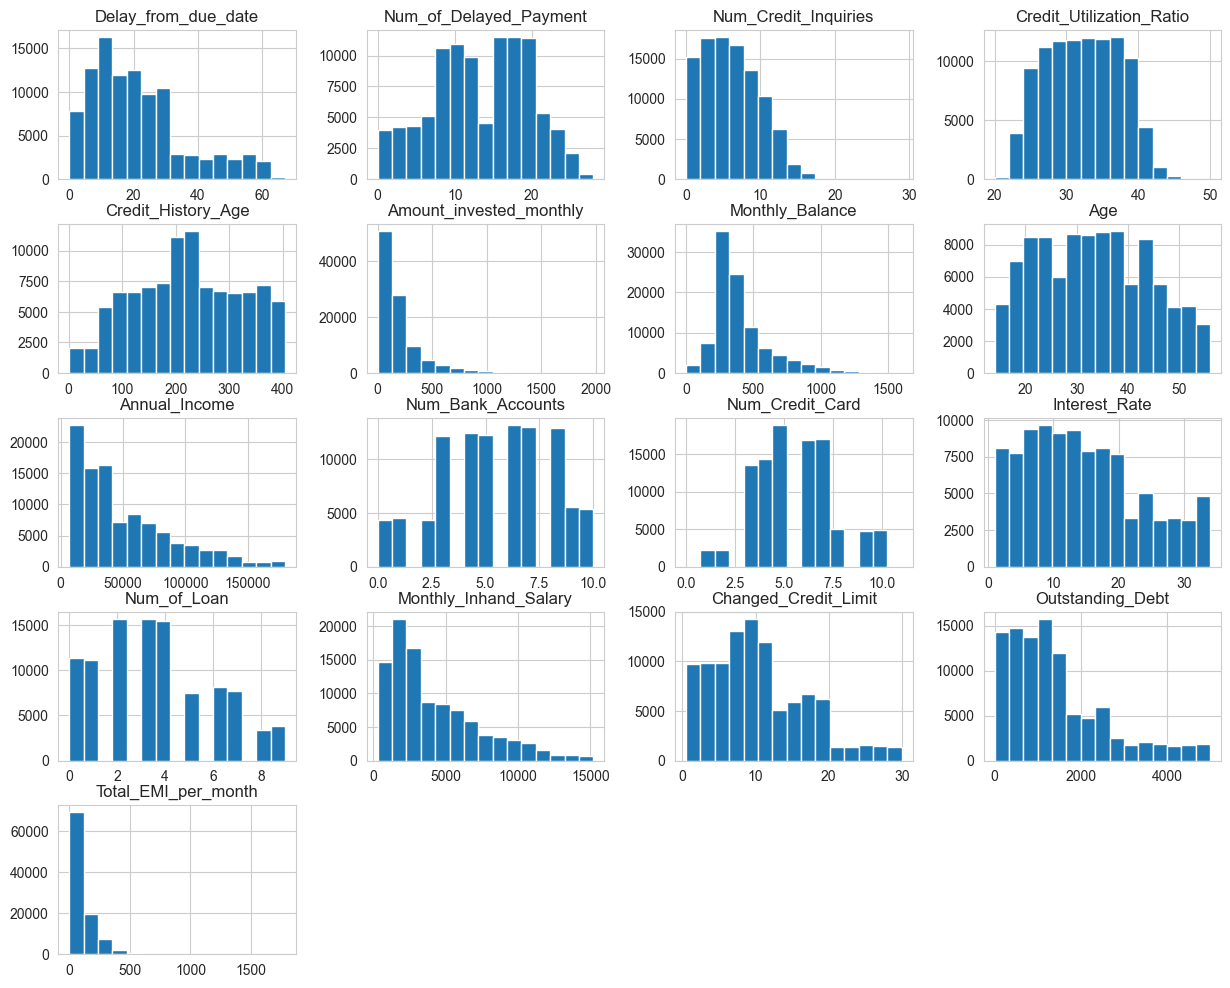

In [26]:
df.hist(figsize=(15, 12), bins=15);

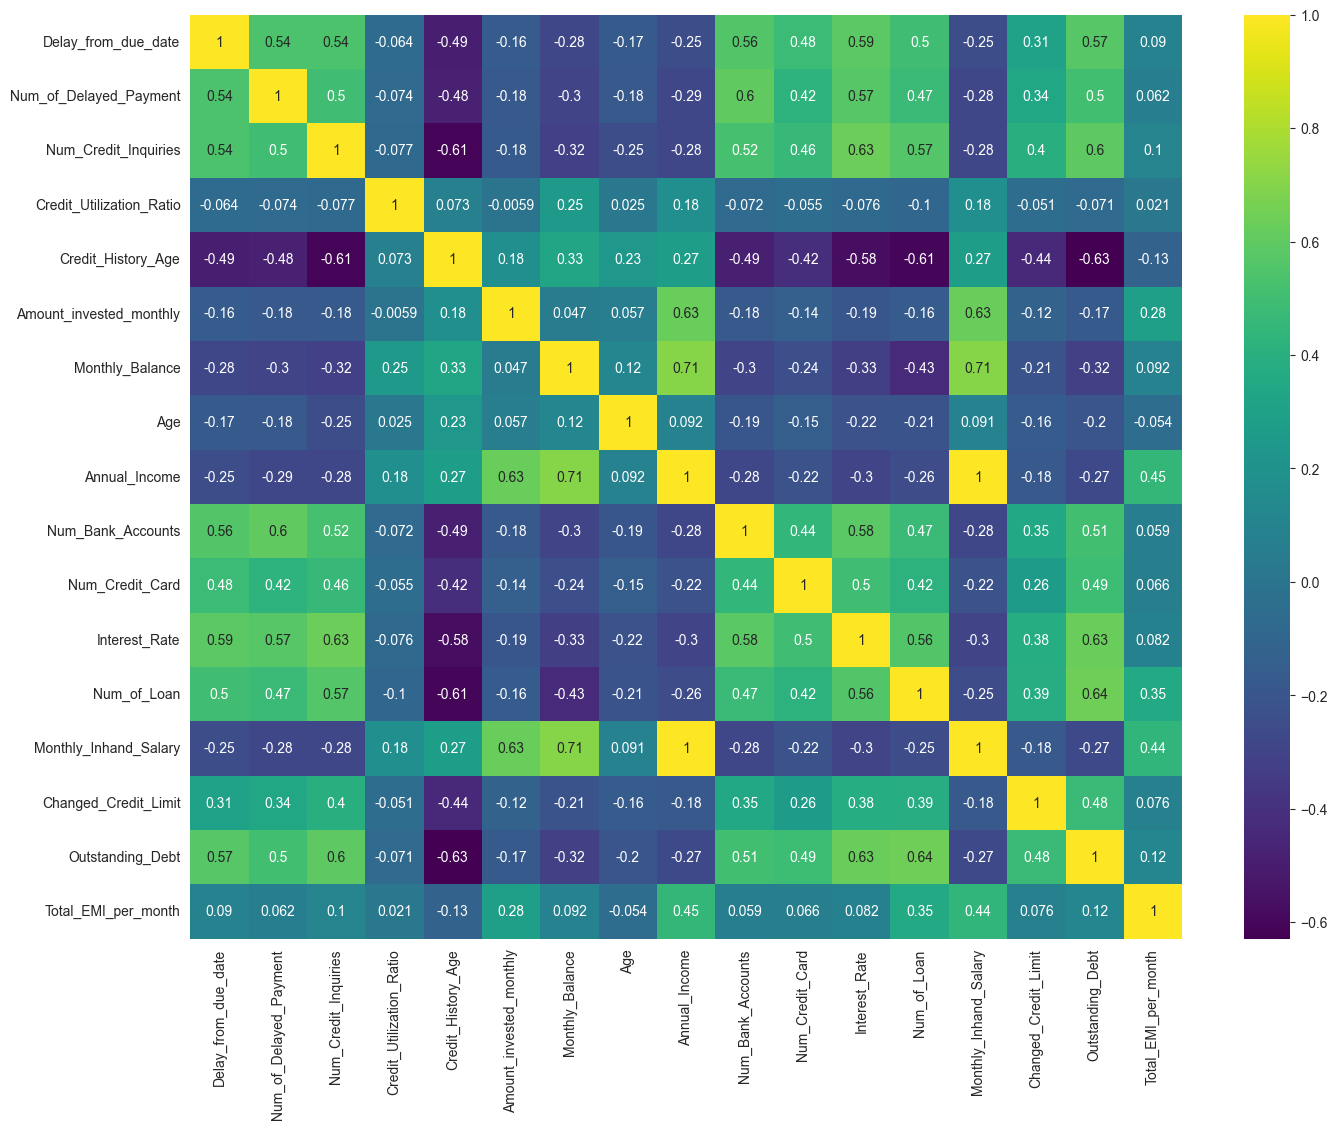

In [10]:
# plt.figure(figsize=(16, 12))
# sns.heatmap(df.corr(), annot=True, cmap='viridis');

In [27]:
df.drop(['Annual_Income'], axis=1, inplace=True)

In [28]:
df["Credit_Score"] = df.Credit_Score.map({"Poor" :0, "Standard" : 1, "Good": 2})
df.Credit_Score.value_counts()

1    53149
0    28988
2    17823
Name: Credit_Score, dtype: int64

In [29]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# encoded_columns = encoder.fit_transform(df[['Credit_Score', 'Payment_of_Min_Amount','Credit_Mix', 'Payment_Behaviour']])

# df[['Credit_Score', 'Payment_of_Min_Amount','Credit_Mix', 'Payment_Behaviour']] = encoded_columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Num_Bank_Accounts,...,Total_EMI_per_month,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,3.000,7.000,4.000,26.823,265.000,80.415,312.494,2,23.000,3.000,...,49.575,1,0,1,0,1,0,0,0,0
1,3.000,7.000,4.000,31.945,265.000,118.280,284.629,2,23.000,3.000,...,49.575,1,0,1,0,1,0,0,0,0
2,3.000,7.000,4.000,28.609,267.000,81.700,331.210,2,23.000,3.000,...,49.575,1,0,1,0,1,0,0,0,0
3,5.000,4.000,4.000,31.378,268.000,199.458,223.451,2,23.000,3.000,...,49.575,1,0,1,0,1,0,0,0,0
4,6.000,4.000,4.000,24.797,269.000,41.420,341.489,2,23.000,3.000,...,49.575,1,0,1,0,1,0,0,0,0


In [13]:
#df.corr()['Credit_Score'][:-1].sort_values().plot.barh();

KeyError: 'Credit_Score'

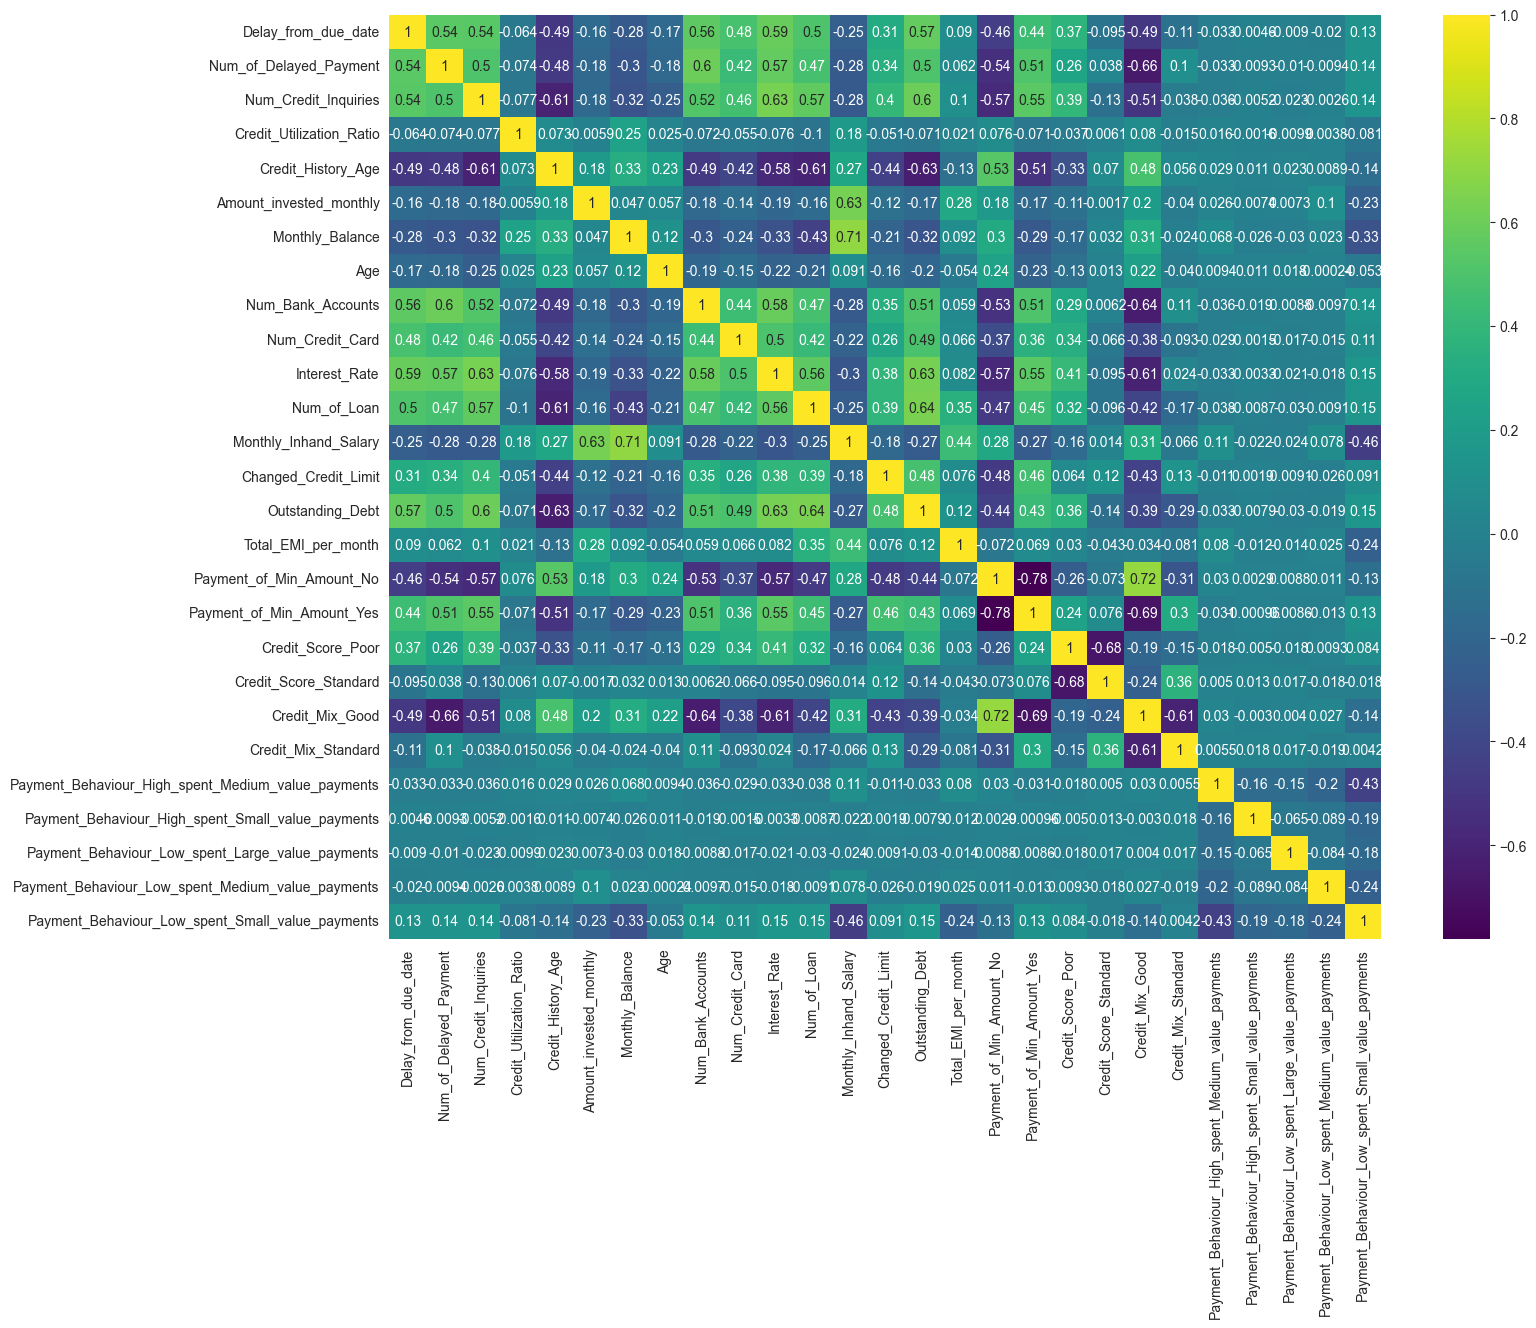

In [14]:
# plt.figure(figsize=(16, 12))
# sns.heatmap(df.corr(), annot=True, cmap='viridis');

## Preprocessing of Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
X = df.drop('Credit_Score', axis=1).values
y = df['Credit_Score'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [35]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(units=128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=16, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=8, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=3, activation="softmax"))

opt = Adam(learning_rate=0.002)

model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
             run_eagerly=True)

In [36]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)

In [37]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
class_weights

{0: 1.1494499597531527, 1: 0.6269180917339131, 2: 1.8694595100056106}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/500

2531/2531 [==============================] - 229s 90ms/step - loss: 0.7989 - accuracy: 0.6454 - val_loss: 0.7802 - val_accuracy: 0.6557
Epoch 2/500
2531/2531 [==============================] - 279s 110ms/step - loss: 0.7659 - accuracy: 0.6595 - val_loss: 0.7588 - val_accuracy: 0.6719
Epoch 3/500
2531/2531 [==============================] - 243s 96ms/step - loss: 0.7599 - accuracy: 0.6608 - val_loss: 0.7686 - val_accuracy: 0.6656
Epoch 4/500
2531/2531 [==============================] - 234s 92ms/step - loss: 0.7517 - accuracy: 0.6646 - val_loss: 0.7649 - val_accuracy: 0.6747
Epoch 5/500
2531/2531 [==============================] - 280s 111ms/step - loss: 0.7502 - accuracy: 0.6667 - val_loss: 0.7483 - val_accuracy: 0.6738
Epoch 6/500
2531/2531 [==============================] - 233s 92ms/step - loss: 0.7481 - accuracy: 0.6673 - val_loss: 0.7590 - val_accuracy: 0.6751
Epoch 7/500
2531/2531 [==============================] - 230s 91ms/step - loss: 0.7438 - accuracy: 0.6673 - v

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
y_pred = (model.predict(Xt_test) > 0.5).astype("int32")
print(confusion_matrix(yt_test, y_pred))
print(classification_report(yt_test, y_pred))

In [29]:
model.history.history

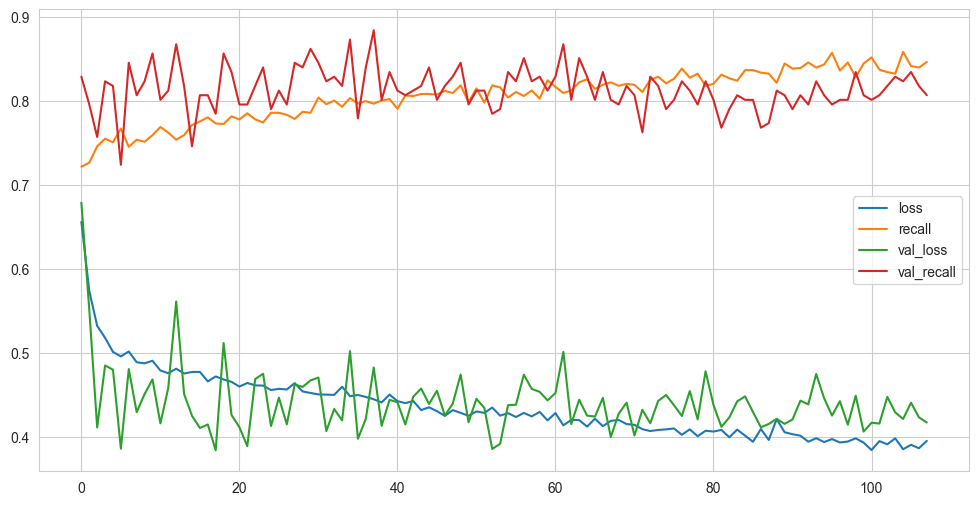

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

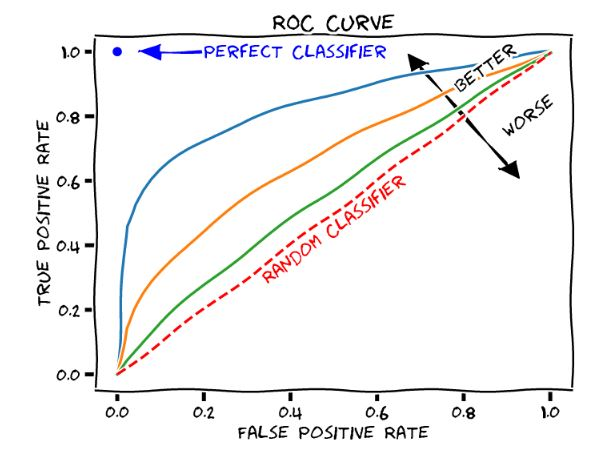

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

In [31]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show();
# roc curve, sınıflandırma performansını gösterir

In [30]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

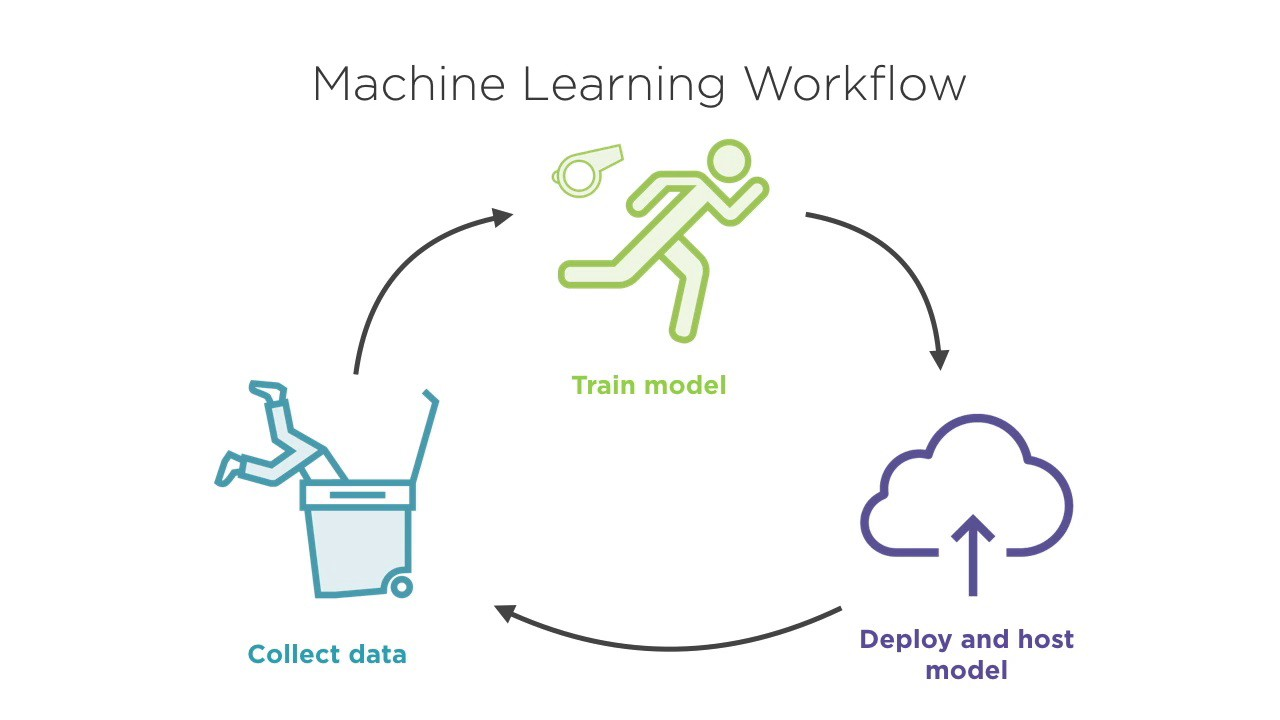

## Final Model and Model Deployment

In [38]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

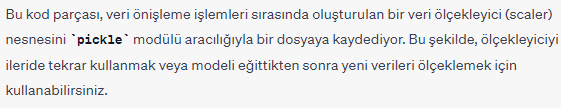

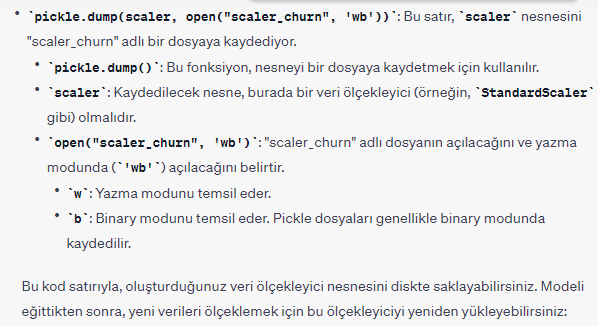

In [39]:
scaler = MinMaxScaler().fit(X)

In [40]:
X_scaled = scaler.transform(X)

In [41]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [42]:
model.fit(x=X_scaled,
          y=y,
          callbacks=[early_stop],
          batch_size=32,
          validation_split = 0.1,
          epochs=500,
          verbose=1,
          class_weight=class_weights)   

Epoch 1/500
282/282 [==============================] - 4s 5ms/step - loss: 0.6950 - recall: 0.5716 - val_loss: 0.6297 - val_recall: 0.4860
Epoch 2/500
282/282 [==============================] - 1s 4ms/step - loss: 0.6114 - recall: 0.6572 - val_loss: 0.5823 - val_recall: 0.6313
Epoch 3/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5852 - recall: 0.6846 - val_loss: 0.5506 - val_recall: 0.6592
Epoch 4/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5694 - recall: 0.7153 - val_loss: 0.5499 - val_recall: 0.7039
Epoch 5/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5403 - recall: 0.7244 - val_loss: 0.5910 - val_recall: 0.7765
Epoch 6/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5220 - recall: 0.7589 - val_loss: 0.5046 - val_recall: 0.6872
Epoch 7/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5088 - recall: 0.7465 - val_loss: 0.4976 - val_recall: 0.7039
Epoch 8/500
282/282 [======

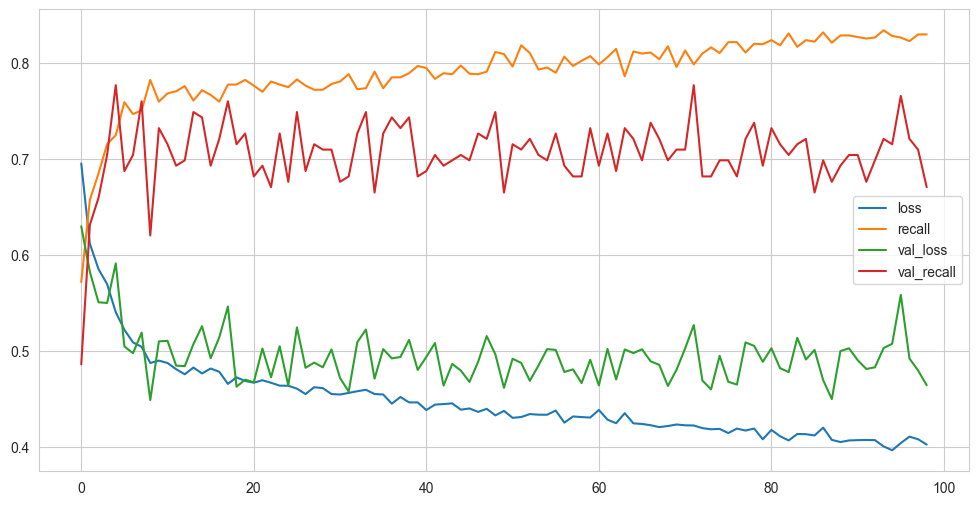

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [44]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3517964482307434
recall :  0.8186274766921997


In [45]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[668 128]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       796
           1       0.57      0.82      0.67       204

    accuracy                           0.83      1000
   macro avg       0.76      0.83      0.78      1000
weighted avg       0.87      0.83      0.85      1000



In [46]:
model.save('model_churn.h5')

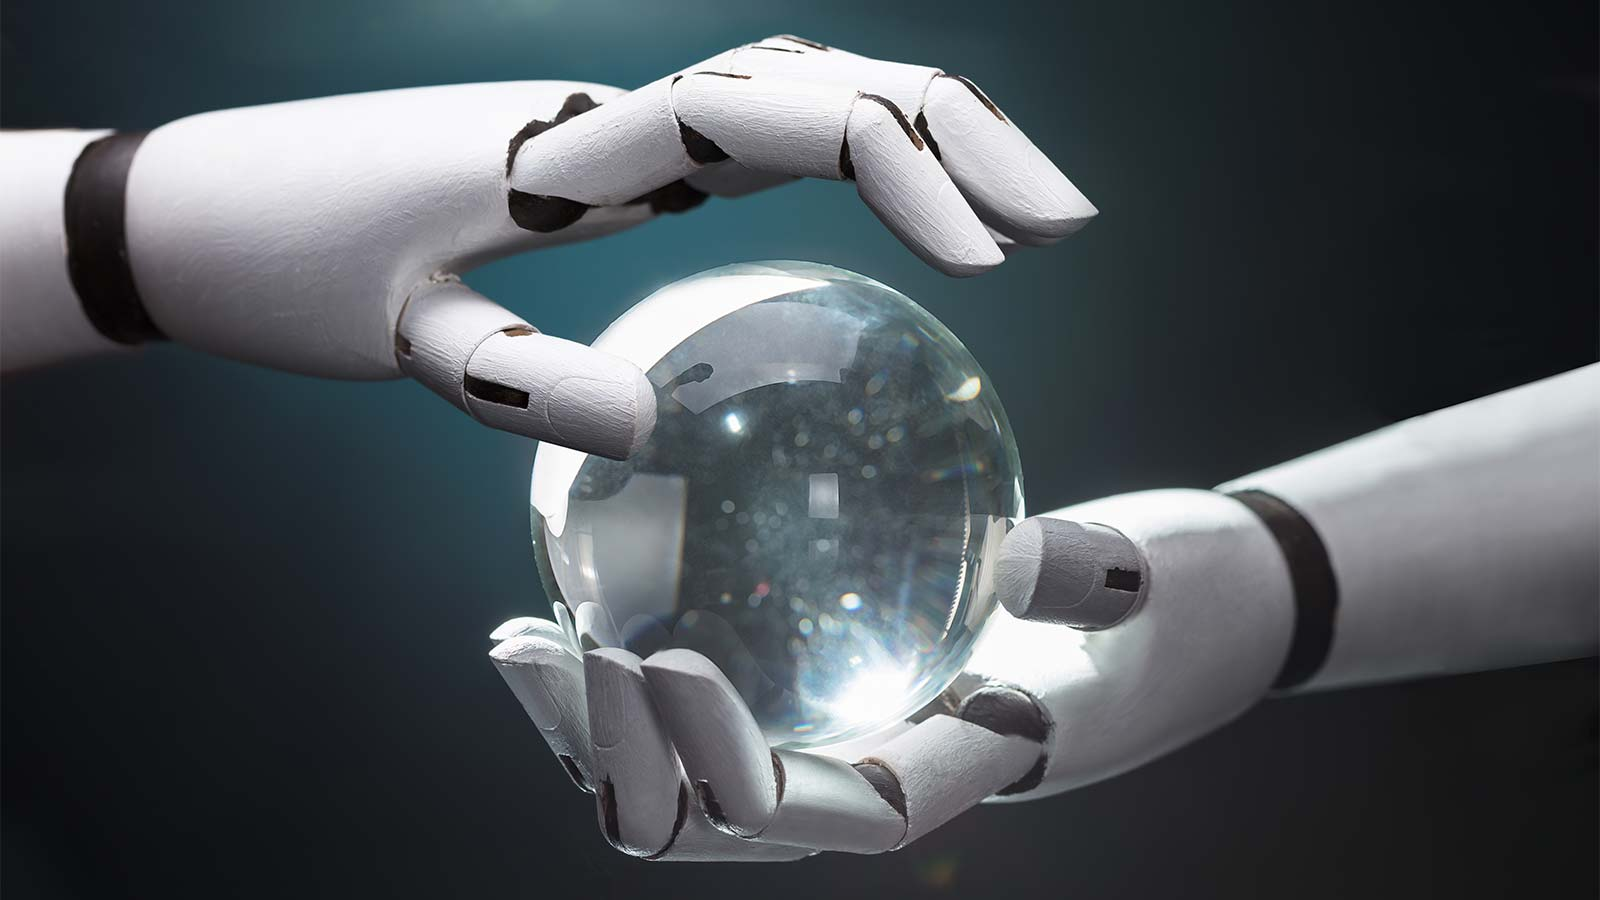

### Prediction

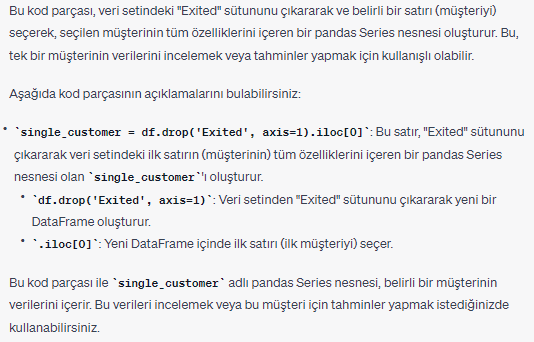

In [47]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [49]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

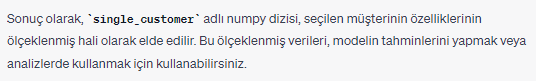

In [50]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 25ms/step


array([[1]])

In [51]:
df["Exited"].iloc[0]

1

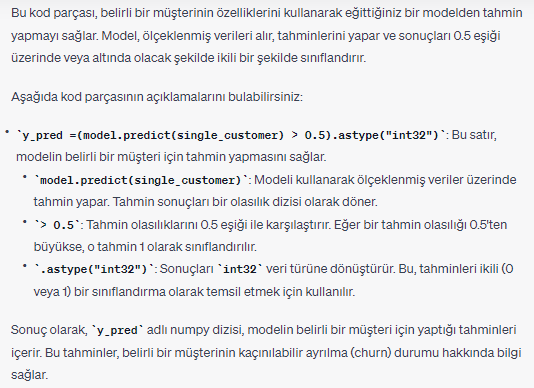

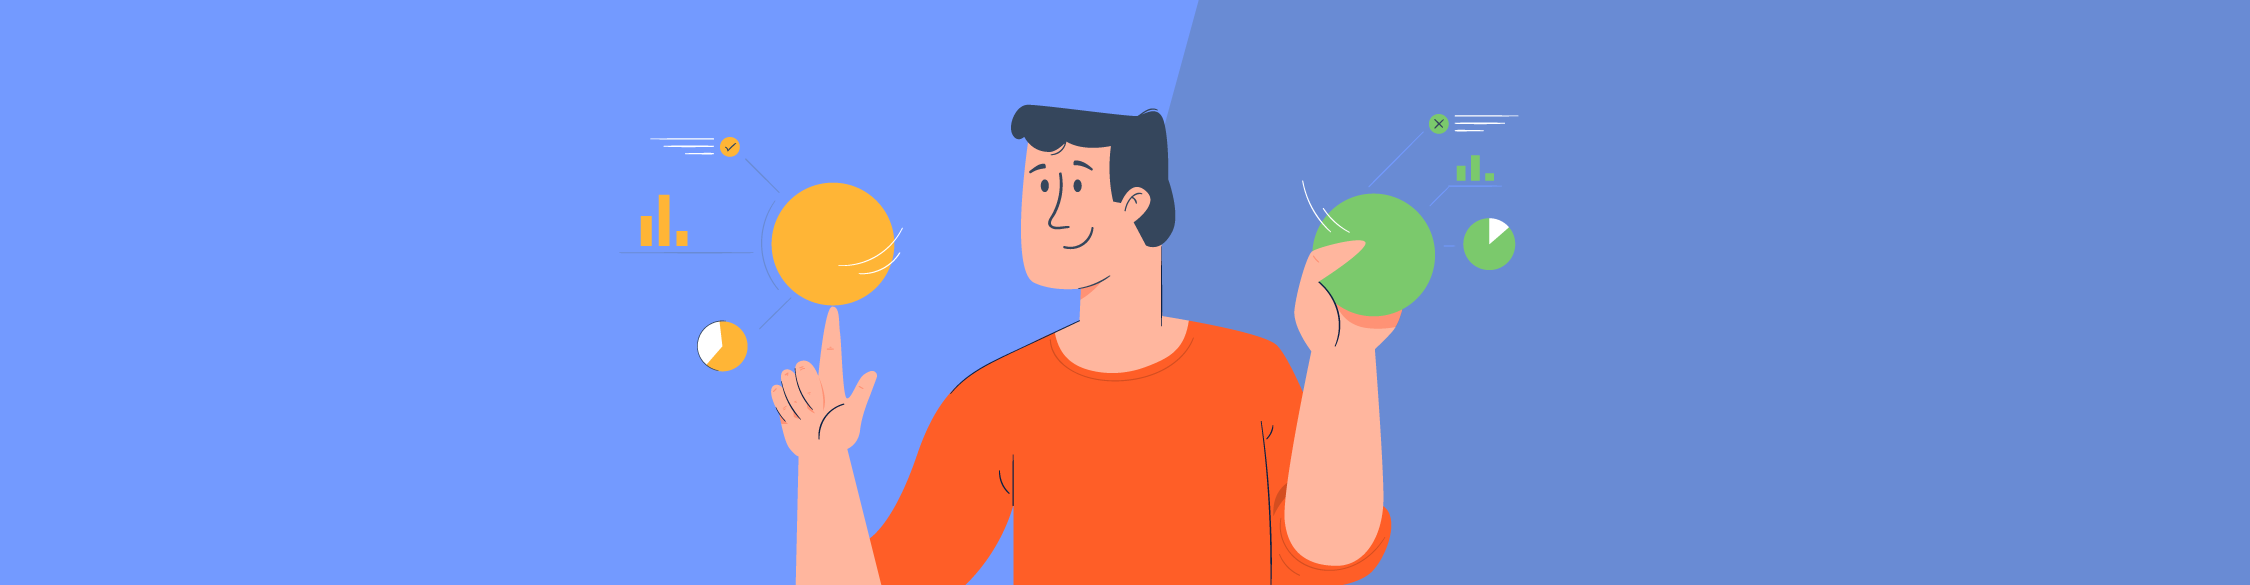

## Comparison with ML

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV

In [58]:
log_model=LogisticRegressionCV(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       796
           1       0.37      0.68      0.48       204

    accuracy                           0.70      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.70      0.72      1000



### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier


In [55]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



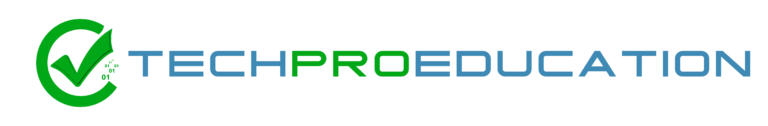